In [6]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

In [7]:
breast_df = pd.read_csv("C:/Users/kfroo/OneDrive/Desktop/Thesis/Breast Cancer Dataset/dataR2.csv")
bank_df = pd.read_csv("C:/Users/kfroo/OneDrive/Desktop/Thesis/Bank Marketing Dataset/bank/bank-full.csv", sep = ';')
polish_df = pd.read_csv("C:/Users/kfroo/OneDrive/Desktop/Thesis/Polish Companies Bankruptcy Dataset/5year.csv")
stroke_df = pd.read_csv("C:/Users/kfroo/OneDrive/Desktop/Thesis/Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv") 

In [8]:
def load_data(df, split = True):
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1:].squeeze()
    feature_names = X.columns
    if split == False:
        return X, y, feature_names
    if split == True:
        x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=390, test_size=0.3)
        return x_train, x_test, y_train, y_test, feature_names

In [10]:
def load_classifier(x_train, y_train, maxdepth = list, min_samples_leaf= list):
    classifier = DecisionTreeClassifier(random_state=1024)
    param_grid = {'max_depth': maxdepth,
                  'criterion' :['gini', 'entropy'],
                  'min_samples_leaf': min_samples_leaf}
    grid_search = sklearn.model_selection.GridSearchCV(estimator=classifier,  
                           param_grid = param_grid, 
                           scoring = ['accuracy', 'f1'],
                           refit = 'accuracy',
                           cv=5, 
                           verbose=True, 
                           return_train_score=True)
    grid_search.fit(x_train, y_train)
    model = grid_search
    return model

In [11]:
depth_list = range(2, 20)
min_leaf = [3, 4, 5]
x_train, x_test, y_train, y_test, features = load_data(df = breast_df)
model = load_classifier(x_train, y_train, maxdepth=depth_list, min_samples_leaf = min_leaf)
train_accuracy = model.cv_results_.get('mean_train_accuracy')
test_accuracy = model.cv_results_.get('mean_test_accuracy')

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [12]:
model.best_score_

0.7286764705882354

In [13]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3}

In [90]:
def graph_results(model):
    #When we have gini and entropy as losses 
    half = int(len(model.cv_results_.get('params'))/2)
    
    #length of min_leaf_samples 
    cycle_len = len(min_leaf)
    print(type(half), type(cycle_len))
    for j in range(cycle_len):
        plt.plot(depth_list, train_accuracy[j:half:cycle_len], '-', label = f"gini_train_{min_leaf[j]}", linewidth = 2)
        plt.plot(depth_list, train_accuracy[half+j::cycle_len], '--', label = f"ent_train_{min_leaf[j]}", linewidth = 2)
        plt.plot(depth_list, test_accuracy[j:half:cycle_len], '-.', label = f"gini_test_{min_leaf[j]}", linewidth = 2)
        plt.plot(depth_list, test_accuracy[half+j::cycle_len], ':', label = f"ent_test_{min_leaf[j]}", linewidth = 2)

        plt.legend()
    return(plt)


In [8]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3}

In [75]:
(params[54::3])

[{'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 5},
 {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5},
 {'cri

<class 'int'> <class 'int'>


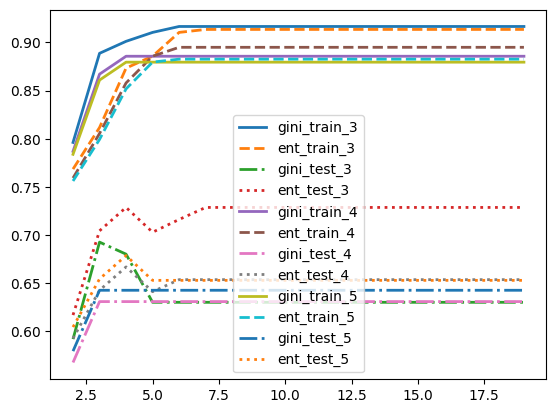

In [91]:
graph_results(model).show()